In [145]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from IPython.display import display
import glob

In [146]:
# apple = Image.open("../images/test/apple/img_31.jpeg")
# grayApple = ImageOps.grayscale(apple)

apple_images = []
folder_path = '../images/test/apple'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/avocado'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/banana'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/cherry'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/kiwi'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/mango'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/orange'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/pineapple'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/strawberries'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))
folder_path = '../images/test/watermelon'
for file_path in glob.glob(folder_path + '/*'):
    apple_images.append(Image.open(file_path))


# find minimum size of images
min_w, min_h = apple_images[0].size
index_w = 0
index_h = 0
for i, image in enumerate(apple_images):
    width, height = image.size
    if(width < min_w):
        min_w = width
        index_w = i
    if(height < min_h):
        min_h = height
        index_h = i

print(min_w, min_h)

# resize to minimum size and greyscale 
apple_images_resized = []
apple_arr = []
for image in apple_images:
    resized = ImageOps.grayscale(image.resize((min_w, min_h)))
    apple_arr.append(np.asarray(resized))
    apple_images_resized.append(resized)


168 134


First Index of the array.

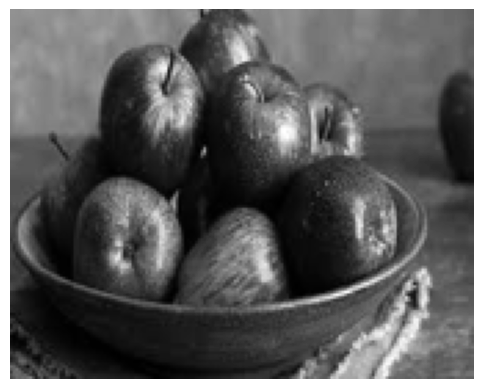

In [147]:
plt.imshow(apple_arr[0], cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

What we are trying to find is closest to.

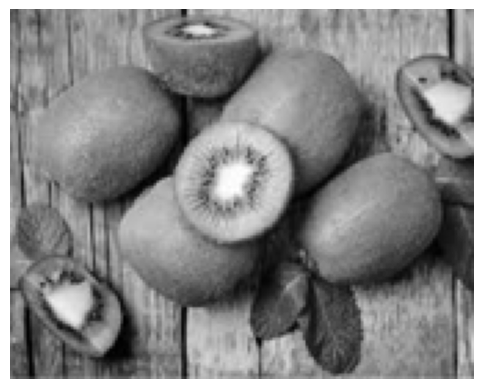

In [150]:
apple = Image.open("../images/predict/321.jpeg")
resized_apple = ImageOps.grayscale(apple.resize((min_w, min_h)))
arr = np.asarray(resized_apple)
plt.imshow(arr, cmap='gray')
plt.axis('off')  
plt.show()

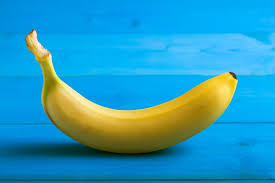

In [151]:
min_dist_sq = np.inf
min_index = -1

for i in range(len(apple_arr)):
    diff = apple_arr[i].astype(np.int32) - arr.astype(np.int32)
    dist_sq = np.sum(diff**2)  # Compute the sum of squared differences element-wise
    if dist_sq < min_dist_sq:
        min_dist_sq = dist_sq
        min_index = i

display(apple_images[min_index])